http://hamelg.blogspot.ie/?view=flipcard

https://solomonmessing.wordpress.com/2014/01/19/visualization-series-the-scatterplot-or-how-to-use-data-so-you-dont-get-ripped-off/

https://www.analyticsvidhya.com/blog/2016/01/guide-data-exploration/

http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html

https://www.analyticsvidhya.com/blog/2015/04/comprehensive-guide-data-exploration-sas-using-python-numpy-scipy-matplotlib-pandas/

https://www.analyticsvidhya.com/blog/2016/07/deeper-regression-analysis-assumptions-plots-solutions/


In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
%config InlineBackend.figure_format = 'png' #set 'png' here when working on notebook
warnings.filterwarnings('ignore') 

# Set some parameters to get good visuals - style to ggplot and size to 15,10
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 10)

In [2]:
#load the file and set the first column as the index
train = pd.read_csv(r"C:\Users\piush\Desktop\Dataset\Assignment 1\diamonds.csv",index_col = 0)

#### 1. Steps of Data Exploration and Preparation

Remember the quality of your inputs decide the quality of your output. So, once you have got your business hypothesis ready, it makes sense to spend lot of time and efforts here. With my personal estimate, data exploration, cleaning and preparation can take up to 70% of your total project time.

Below are the steps involved to understand, clean and prepare your data for building your predictive model:

1. Variable Identification
2. Univariate Analysis
3. Bi-variate Analysis
4. Missing values treatment
5. Outlier treatment
6. Variable transformation
7. Variable creation

Finally, we will need to iterate over steps 4 – 7 multiple times before we come up with our refined model.

##### Variable Identification

First, identify Predictor (Input) and Target (output) variables. Next, identify the data type and category of the variables.

#### Univariate Analysis

At this stage, we explore variables one by one. Method to perform uni-variate analysis will depend on whether the variable type is categorical or continuous. Univariate analysis is also used to highlight missing and outlier values. Let’s look at these methods and statistical measures for categorical and continuous variables individually:

1. Continuous Variables:- In case of continuous variables, we need to understand the central tendency and spread of the variable. These are measured using various statistical metrics visualization methods as shown below:

![photo](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Data_exploration_31.png)


2. Categorical Variables:- For categorical variables, we’ll use frequency table to understand distribution of each category. We can also read as percentage of values under each category. It can be be measured using two metrics, Count and Count% against each category. Bar chart can be used as visualization.

In [6]:
#Separate Categorical Variables
cats = []
for col in train.columns.values:
    if train[col].dtype == 'object':
        cats.append(col)

In [7]:
#Create separte datasets for Continuous vs Categorical

train_cont = train.drop(cats, axis=1)
train_cat = train[cats]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002C373D0DA90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000002C3743B7630>]], dtype=object)

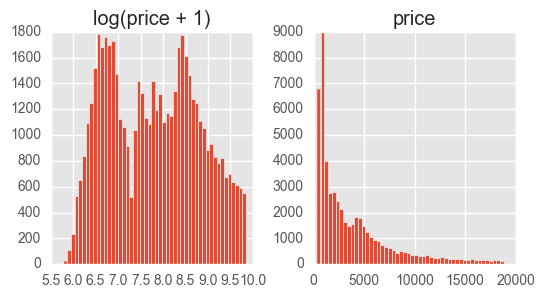

In [8]:
plt.rcParams['figure.figsize'] = (6.0, 3.0)
prices = pd.DataFrame({"price":train["price"], "log(price + 1)":np.log1p(train["price"])})
prices.hist(bins = 50)

#### One-Way Tables


http://hamelg.blogspot.ie/2015/11/python-for-data-analysis-part-19_17.html

Create frequency tables (also known as crosstabs) in pandas using the pd.crosstab() function. The function takes one or more array-like objects as indexes or columns and then constructs a new DataFrame of variable counts based on the supplied arrays. Let's make a one-way table of the clarity variable. Even these simple one-way tables give us some useful insight: we immediately get a sense of distribution of records across the categories. 

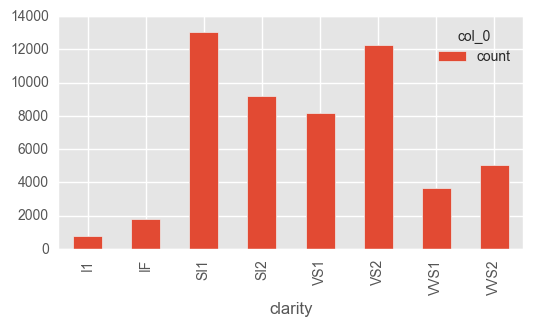

In [9]:
my_tab = pd.crosstab(index = train["clarity"],  # Make a crosstab
                              columns="count")      # Name the count column

my_tab.plot.bar()

Since the crosstab function produces DataFrames, the DataFrame operations we've learned work on crosstabs

In [10]:
print (my_tab.sum(), "\n")   # Sum the counts

print (my_tab.shape, "\n")   # Check number of rows and cols

my_tab.iloc[1:7]             # Slice rows 1-6

col_0
count    53940
dtype: int64 

(8, 1) 



col_0,count
clarity,
IF,1790
SI1,13065
SI2,9194
VS1,8171
VS2,12258
VVS1,3655


One of the most useful aspects of frequency tables is that they allow you to extract the proportion of the data that belongs to each category. With a one-way table, you can do this by dividing each table value by the total number of records in the table:

In [11]:
my_tab/my_tab.sum()

col_0,count
clarity,
I1,0.013737
IF,0.033185
SI1,0.242214
SI2,0.170449
VS1,0.151483
VS2,0.227253
VVS1,0.067760
VVS2,0.093919


### Bi-variate Analysis

Bi-variate Analysis finds out the relationship between two variables. Here, we look for association and disassociation between variables at a pre-defined significance level. We can perform bi-variate analysis for any combination of categorical and continuous variables. The combination can be: Categorical & Categorical, Categorical & Continuous and Continuous & Continuous. Different methods are used to tackle these combinations during analysis process.

Let’s understand the possible combinations in detail:

*** Continuous & Continuous: While doing bi-variate analysis between two continuous variables, we should look at scatter plot. It is a nifty way to find out the relationship between two variables. The pattern of scatter plot indicates the relationship between variables. The relationship can be linear or non-linear.

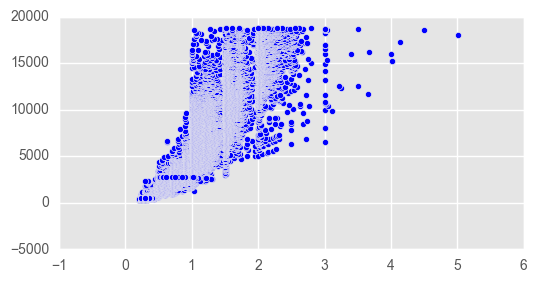

In [12]:
plt.scatter(train['carat'], train['price'])

Scatter plot shows the relationship between two variable but does not indicates the strength of relationship amongst them. To find the strength of the relationship, we use Correlation. Correlation varies between -1 and +1.

* -1: perfect negative linear correlation
* +1:perfect positive linear correlation and 
* 0: No correlation

Correlation can be derived using following formula:

**Correlation = Covariance(X,Y) / SQRT( Var(X)* Var(Y))

Various tools have function or functionality to identify correlation between variables. In Excel, function CORREL() is used to return the correlation between two variables and SAS uses procedure PROC CORR to identify the correlation. These function returns Pearson Correlation value to identify the relationship between two variables:

#### Categorical & Categorical: To find the relationship between two categorical variables, we can use following methods:

* Two-way table: We can start analyzing the relationship by creating a two-way table of count and count%. The rows represents the category of one variable and the columns represent the categories of the other variable. We show count or count% of observations available in each combination of row and column categories.
* Stacked Column Chart: This method is more of a visual form of Two-way table.

In [13]:
#two-way table
grouped = train.groupby(['cut','clarity'])
grouped.size()

cut        clarity
Fair       I1          210
           IF            9
           SI1         408
           SI2         466
           VS1         170
           VS2         261
           VVS1         17
           VVS2         69
Good       I1           96
           IF           71
           SI1        1560
           SI2        1081
           VS1         648
           VS2         978
           VVS1        186
           VVS2        286
Ideal      I1          146
           IF         1212
           SI1        4282
           SI2        2598
           VS1        3589
           VS2        5071
           VVS1       2047
           VVS2       2606
Premium    I1          205
           IF          230
           SI1        3575
           SI2        2949
           VS1        1989
           VS2        3357
           VVS1        616
           VVS2        870
Very Good  I1           84
           IF          268
           SI1        3240
           SI2        2100
         

#### Two-Way Tables
Two-way frequency tables, also called contingency tables, are tables of counts with two dimensions where each dimension is a different variable. Two-way tables can give you insight into the relationship between two variables. To create a two way table, pass two variables to the pd.crosstab() function instead of one:

In [39]:
# Table of survival vs. sex
clarity_cut = pd.crosstab(index=train["clarity"], 
                           columns=train["cut"])#,margins = True)

#survived_class.columns = ["class1","class2","class3","rowtotal"]
#survived_sex.index= ["died","survived"]
clarity_cut.index=['I1','IF','SI1','SI2','VS1','VS2','VVS1','VVS2 ']
clarity_cut

cut,Fair,Good,Ideal,Premium,Very Good
I1,210,96,146,205,84
IF,9,71,1212,230,268
SI1,408,1560,4282,3575,3240
SI2,466,1081,2598,2949,2100
VS1,170,648,3589,1989,1775
VS2,261,978,5071,3357,2591
VVS1,17,186,2047,616,789
VVS2,69,286,2606,870,1235


You can get the marginal counts (totals for each row and column) by including the argument margins=True:

In [40]:
clarity_cut = pd.crosstab(index=train["clarity"], 
                           columns=train["cut"],margins = True)

#survived_class.columns = ["class1","class2","class3","rowtotal"]
#survived_sex.index= ["died","survived"]
clarity_cut.columns = ['Fair','Good','Ideal','Premium','Very Good','rowTotal']
clarity_cut.index=['I1','IF','SI1','SI2','VS1','VS2','VVS1','VVS2','colTotal']
clarity_cut

,Fair,Good,Ideal,Premium,Very Good,rowTotal
I1,210,96,146,205,84,741
IF,9,71,1212,230,268,1790
SI1,408,1560,4282,3575,3240,13065
SI2,466,1081,2598,2949,2100,9194
VS1,170,648,3589,1989,1775,8171
VS2,261,978,5071,3357,2591,12258
VVS1,17,186,2047,616,789,3655
VVS2,69,286,2606,870,1235,5066
colTotal,1610,4906,21551,13791,12082,53940


To get the total proportion of counts in each cell, divide the table by the grand total:

In [42]:
#clarity_x/clarity_x.ix['coltotal','rowtotal']
clarity_cut/clarity_cut.ix['colTotal','rowTotal']


,Fair,Good,Ideal,Premium,Very Good,rowTotal
I1,0.003893,0.001780,0.002707,0.003801,0.001557,0.013737
IF,0.000167,0.001316,0.022469,0.004264,0.004968,0.033185
SI1,0.007564,0.028921,0.079385,0.066277,0.060067,0.242214
SI2,0.008639,0.020041,0.048165,0.054672,0.038932,0.170449
VS1,0.003152,0.012013,0.066537,0.036874,0.032907,0.151483
VS2,0.004839,0.018131,0.094012,0.062236,0.048035,0.227253
VVS1,0.000315,0.003448,0.037950,0.011420,0.014627,0.067760
VVS2,0.001279,0.005302,0.048313,0.016129,0.022896,0.093919
colTotal,0.029848,0.090953,0.399537,0.255673,0.223990,1.000000


To get the proportion of counts along each column (in this case, clarity within each diamond class) divide by the column totals:

In [43]:
clarity_cut/clarity_cut.ix['colTotal']

,Fair,Good,Ideal,Premium,Very Good,rowTotal
I1,0.130435,0.019568,0.006775,0.014865,0.006952,0.013737
IF,0.005590,0.014472,0.056239,0.016678,0.022182,0.033185
SI1,0.253416,0.317978,0.198691,0.259227,0.268168,0.242214
SI2,0.289441,0.220342,0.120551,0.213835,0.173812,0.170449
VS1,0.105590,0.132083,0.166535,0.144224,0.146913,0.151483
VS2,0.162112,0.199348,0.235302,0.243420,0.214451,0.227253
VVS1,0.010559,0.037913,0.094984,0.044667,0.065304,0.067760
VVS2,0.042857,0.058296,0.120922,0.063085,0.102218,0.093919
colTotal,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


To get the proportion of counts along each row divide by the row totals. The division operator functions on a row-by-row basis when used on DataFrames by default. In this case we want to divide each column by the rowtotals column. To get division to work on a column by column basis, use df.div() with the axis set to 0 (or "index"):

In [44]:
clarity_cut.div(clarity_cut['rowTotal'],axis=0)

,Fair,Good,Ideal,Premium,Very Good,rowTotal
I1,0.283401,0.129555,0.197031,0.276653,0.113360,1.0
IF,0.005028,0.039665,0.677095,0.128492,0.149721,1.0
SI1,0.031228,0.119403,0.327746,0.273632,0.247991,1.0
SI2,0.050685,0.117577,0.282576,0.320753,0.228410,1.0
VS1,0.020805,0.079305,0.439236,0.243422,0.217232,1.0
VS2,0.021292,0.079785,0.413689,0.273862,0.211372,1.0
VVS1,0.004651,0.050889,0.560055,0.168536,0.215869,1.0
VVS2,0.013620,0.056455,0.514410,0.171733,0.243782,1.0
colTotal,0.029848,0.090953,0.399537,0.255673,0.223990,1.0


Alternatively, you can transpose the table with df.T to swap rows and columns and perform row by row division as normal:

In [45]:
clarity_cut.T/clarity_cut['rowTotal']

,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2,colTotal
Fair,0.283401,0.005028,0.031228,0.050685,0.020805,0.021292,0.004651,0.013620,0.029848
Good,0.129555,0.039665,0.119403,0.117577,0.079305,0.079785,0.050889,0.056455,0.090953
Ideal,0.197031,0.677095,0.327746,0.282576,0.439236,0.413689,0.560055,0.514410,0.399537
Premium,0.276653,0.128492,0.273632,0.320753,0.243422,0.273862,0.168536,0.171733,0.255673
Very Good,0.113360,0.149721,0.247991,0.228410,0.217232,0.211372,0.215869,0.243782,0.223990
rowTotal,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Higher Dimensional Tables
The crosstab() function lets you create tables out of more than two categories. Higher dimensional tables can be a little confusing to look at, but they can also yield finer-grained insight into interactions between multiple variables. Let's create a 3-way table inspecting clarity, cut and color class:

In [46]:
clarity_cut_color = pd.crosstab(index=train["clarity"], 
                             columns=[train["cut"],
                                      train["color"]],
                             margins=True)   # Include row and column totals

clarity_cut_color

cut     Fair                               Good            ...   Premium       \
color      D    E    F    G    H    I    J    D    E    F  ...         I    J   
clarity                                                    ...                  
I1         4    9   35   53   52   34   23    8   23   19  ...        24   13   
IF         3    0    4    2    0    0    0    9    9   15  ...        23   12   
SI1       58   65   83   69   75   30   28  237  355  273  ...       367  209   
SI2       56   78   89   80   91   45   27  223  202  201  ...       312  161   
VS1        5   14   33   45   32   25   16   43   89  132  ...       221  153   
VS2       25   42   53   45   41   32   23  104  160  184  ...       315  202   
VVS1       3    3    5    3    1    1    1   13   43   35  ...        84   24   
VVS2       9   13   10   17   11    8    1   25   52   50  ...        82   34   
All      163  224  312  314  303  175  119  662  933  909  ...      1428  808   

cut     Very Good                                       All  
color           D     E     F     G     H     I    J         
clarity                                                      
I1              5    22    13    16    12     8    8    741  
IF             23    43    67    79    29    19    8   1790  
SI1           494   626   559   474   547   358  182  13065  
SI2           314   445   343   327   343   200  128   9194  
VS1           175   293   293   432   257   205  120   8171  
VS2           309   503   466   479   376   274  184  12258  
VVS1           52   170   174   190   115    69   19   3655  
VVS2          141   298   249   302   145    71   29   5066  
All          1513  2400  2164  2299  1824  1204  678  53940  

[9 rows x 36 columns]

Notice that by passing a second variable to the columns argument, the resulting table has columns categorized by both cut and color. The outermost index (cut) returns sections of the table instead of individual columns:

In [64]:
clarity_cut_color = pd.crosstab(index=train["clarity"], 
                             columns=[train["cut"],
                                      train["color"]],
                             margins=True)   # Include row and column totals

clarity_cut_color

cut     Fair                               Good            ...   Premium       \
color      D    E    F    G    H    I    J    D    E    F  ...         I    J   
clarity                                                    ...                  
I1         4    9   35   53   52   34   23    8   23   19  ...        24   13   
IF         3    0    4    2    0    0    0    9    9   15  ...        23   12   
SI1       58   65   83   69   75   30   28  237  355  273  ...       367  209   
SI2       56   78   89   80   91   45   27  223  202  201  ...       312  161   
VS1        5   14   33   45   32   25   16   43   89  132  ...       221  153   
VS2       25   42   53   45   41   32   23  104  160  184  ...       315  202   
VVS1       3    3    5    3    1    1    1   13   43   35  ...        84   24   
VVS2       9   13   10   17   11    8    1   25   52   50  ...        82   34   
All      163  224  312  314  303  175  119  662  933  909  ...      1428  808   

cut     Very Good                                       All  
color           D     E     F     G     H     I    J         
clarity                                                      
I1              5    22    13    16    12     8    8    741  
IF             23    43    67    79    29    19    8   1790  
SI1           494   626   559   474   547   358  182  13065  
SI2           314   445   343   327   343   200  128   9194  
VS1           175   293   293   432   257   205  120   8171  
VS2           309   503   466   479   376   274  184  12258  
VVS1           52   170   174   190   115    69   19   3655  
VVS2          141   298   249   302   145    71   29   5066  
All          1513  2400  2164  2299  1824  1204  678  53940  

[9 rows x 36 columns]

In [65]:
clarity_cut_color['Ideal'] # Get the subtable under cut: Ideal

color,D,E,F,G,H,I,J
clarity,,,,,,,
I1,13,18,42,16,38,17,2
IF,28,79,268,491,226,95,25
SI1,738,766,608,660,763,504,243
SI2,356,469,453,486,450,274,110
VS1,351,593,616,953,467,408,201
VS2,920,1136,879,910,556,438,232
VVS1,144,335,440,594,326,179,29
VVS2,284,507,520,774,289,178,54
All,2834,3903,3826,4884,3115,2093,896


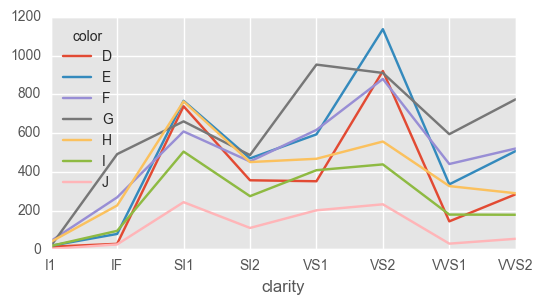

In [59]:
clarity_cut_color['Ideal'].plot()

The secondary column index, color, can't be used as a top level index, but it can be used within a given cut:

In [61]:
clarity_cut_color['Ideal']['E'] 

clarity
I1        18
IF        79
SI1      766
SI2      469
VS1      593
VS2     1136
VVS1     335
VVS2     507
Name: E, dtype: int64

Due to the convenient hierarchical structure of the table, we still use one division to get the proportion of survival across each column:

In [66]:
clarity_cut_color/clarity_cut_color.ix['All']

cut          Fair                                                              \
color           D         E         F         G         H         I         J   
clarity                                                                         
I1       0.024540  0.040179  0.112179  0.168790  0.171617  0.194286  0.193277   
IF       0.018405  0.000000  0.012821  0.006369  0.000000  0.000000  0.000000   
SI1      0.355828  0.290179  0.266026  0.219745  0.247525  0.171429  0.235294   
SI2      0.343558  0.348214  0.285256  0.254777  0.300330  0.257143  0.226891   
VS1      0.030675  0.062500  0.105769  0.143312  0.105611  0.142857  0.134454   
VS2      0.153374  0.187500  0.169872  0.143312  0.135314  0.182857  0.193277   
VVS1     0.018405  0.013393  0.016026  0.009554  0.003300  0.005714  0.008403   
VVS2     0.055215  0.058036  0.032051  0.054140  0.036304  0.045714  0.008403   
All      1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   

cut          Good                        ...      Premium           Very Good  \
color           D         E         F    ...            I         J         D   
clarity                                  ...                                    
I1       0.012085  0.024652  0.020902    ...     0.016807  0.016089  0.003305   
IF       0.013595  0.009646  0.016502    ...     0.016106  0.014851  0.015202   
SI1      0.358006  0.380493  0.300330    ...     0.257003  0.258663  0.326504   
SI2      0.336858  0.216506  0.221122    ...     0.218487  0.199257  0.207535   
VS1      0.064955  0.095391  0.145215    ...     0.154762  0.189356  0.115664   
VS2      0.157100  0.171490  0.202420    ...     0.220588  0.250000  0.204230   
VVS1     0.019637  0.046088  0.038504    ...     0.058824  0.029703  0.034369   
VVS2     0.037764  0.055734  0.055006    ...     0.057423  0.042079  0.093192   
All      1.000000  1.000000  1.000000    ...     1.000000  1.000000  1.000000   

cut                                                                       All  
color           E         F         G         H         I         J            
clarity                                                                        
I1       0.009167  0.006007  0.006960  0.006579  0.006645  0.011799  0.013737  
IF       0.017917  0.030961  0.034363  0.015899  0.015781  0.011799  0.033185  
SI1      0.260833  0.258318  0.206177  0.299890  0.297342  0.268437  0.242214  
SI2      0.185417  0.158503  0.142236  0.188048  0.166113  0.188791  0.170449  
VS1      0.122083  0.135397  0.187908  0.140899  0.170266  0.176991  0.151483  
VS2      0.209583  0.215342  0.208351  0.206140  0.227575  0.271386  0.227253  
VVS1     0.070833  0.080407  0.082645  0.063048  0.057309  0.028024  0.067760  
VVS2     0.124167  0.115065  0.131361  0.079496  0.058970  0.042773  0.093919  
All      1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  

[9 rows x 36 columns]

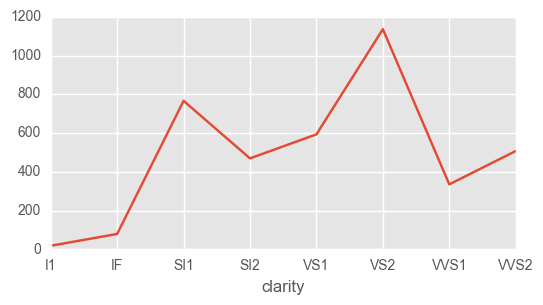

In [60]:
clarity_cut_color['Ideal']['E'].plot()

#### Continous Vs Categorical Variable

http://seaborn.pydata.org/tutorial/categorical.html#drawing-multi-panel-categorical-plots

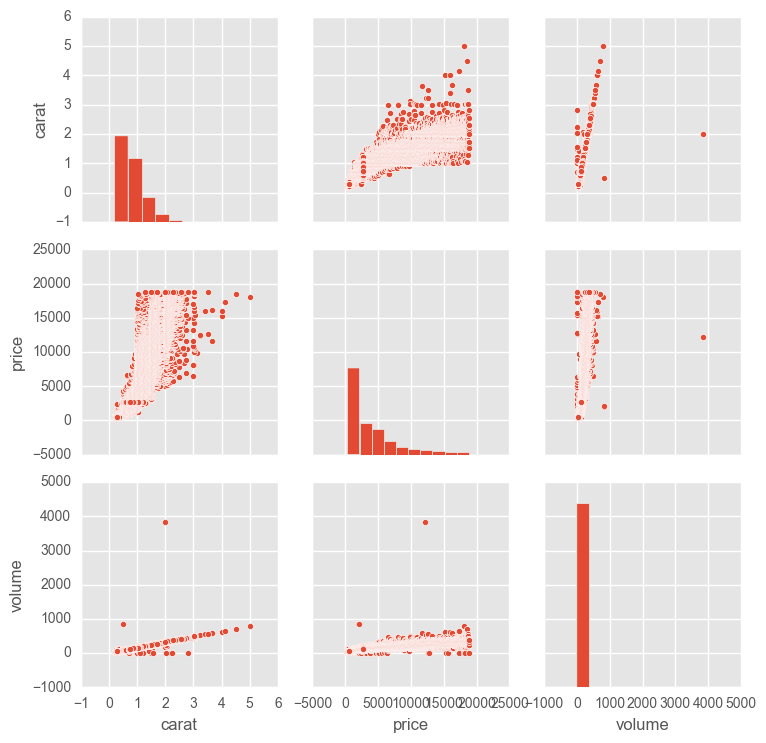

In [8]:
train['volume'] = train.x * train.y * train.z
diamonds_sampled = train.loc[:, ['carat', 'price', 'volume']]
sns.pairplot(diamonds_sampled, size=2.5)

In [ ]:
# create mapping Series for gender so it can be plotted
gender = Series([0,1],index=['male','female'])    
df['gender']=df.Sex.map(gender)

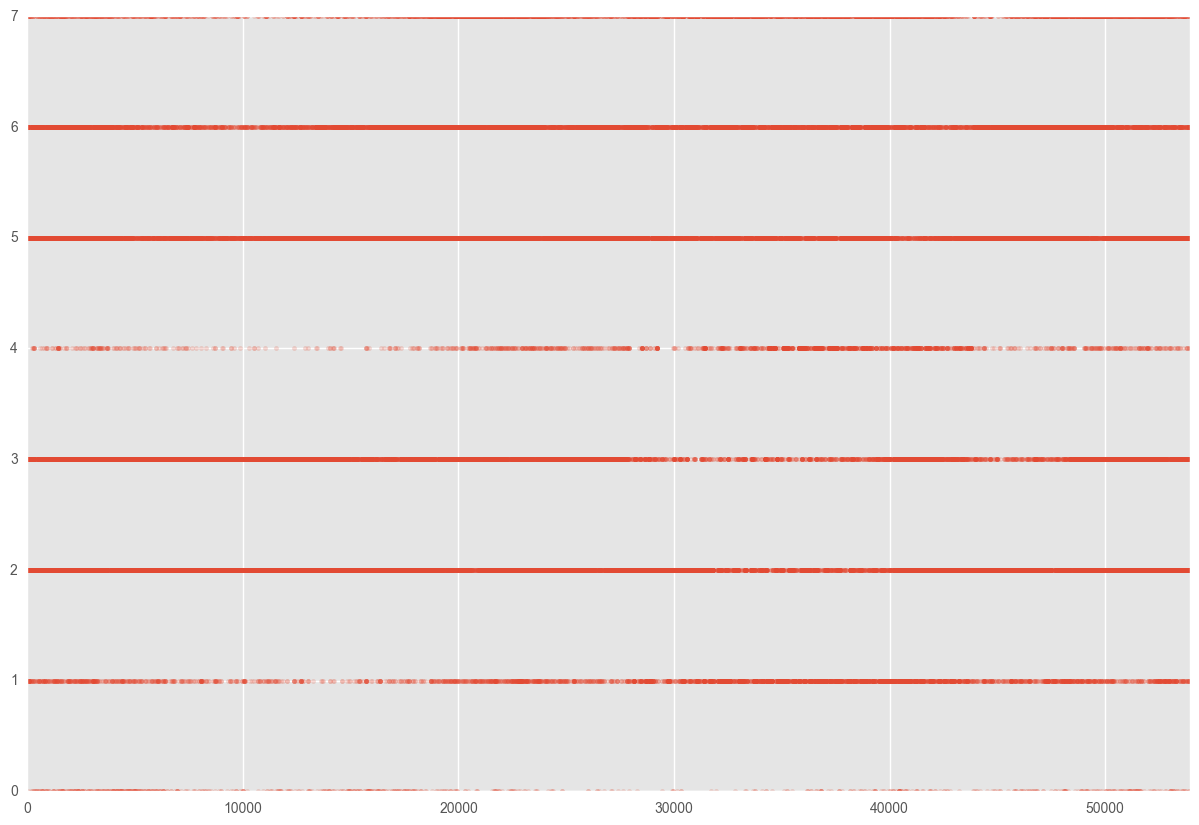

In [12]:
# 1. We want to plot `df.categorical` to see the distribution of events over time
 

# create a mapping from categorical values to unique integers:
integer_map = dict([(val, i) for i, val in enumerate(set(train.clarity))]) 

# plot using this integer map, applied over `categorical`
ax = train.clarity.apply(lambda x: integer_map[x]).plot(
    marker='.',linestyle='', alpha=0.2,
    )

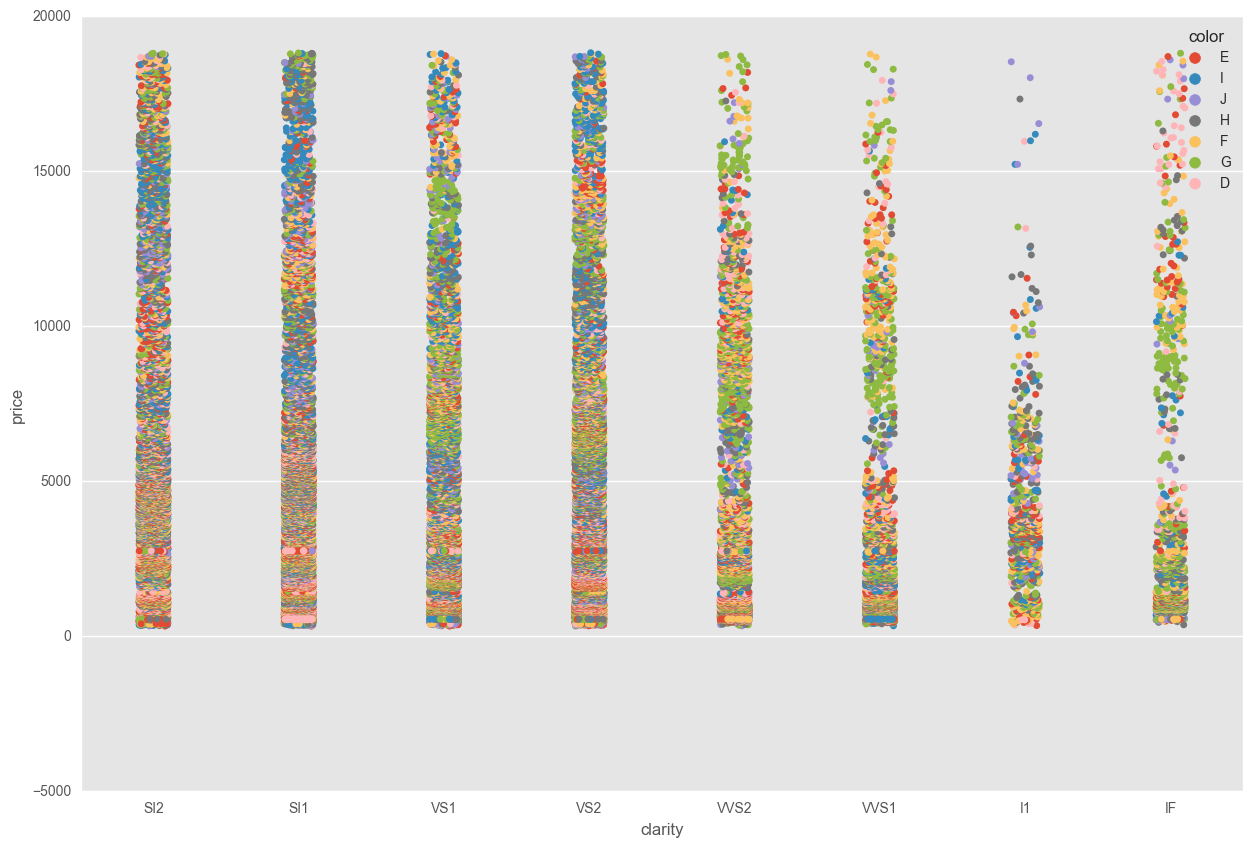

In [17]:
ax = sns.stripplot(x="clarity", y="price",hue ='color', data=train,jitter = True)

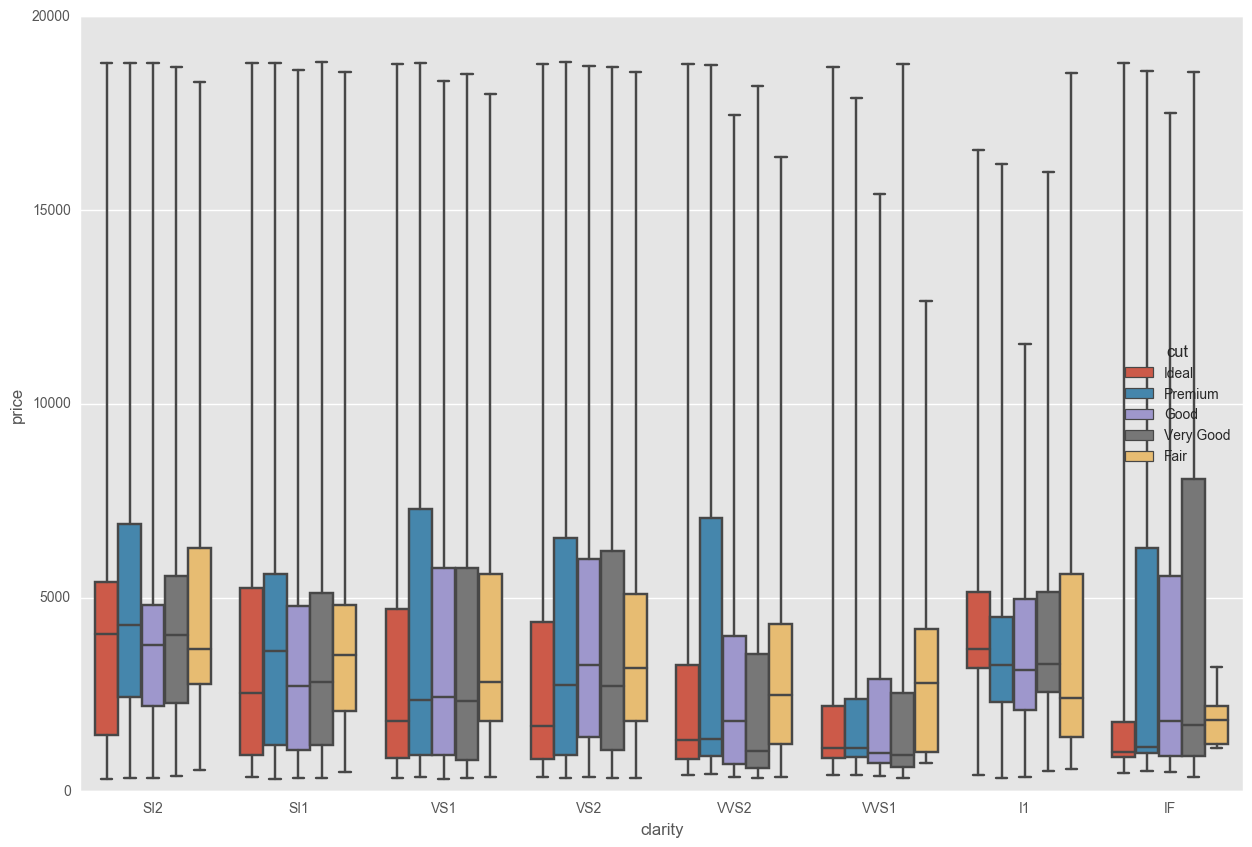

In [20]:
ax = sns.boxplot(x="clarity", y="price",hue ='cut', data=train, whis=np.inf)

In [ ]:
12_diffClosing stocks(kmt)        float64
12_diffExports(kmt)               float64
12_diffImports(kmt)               float64
12_diffRefinery intake(kmt)       float64
12_diffWTI                        float64
12_diffSumClosing stocks(kmt)     float64
12_diffSumExports(kmt)            float64
12_diffSumImports(kmt)            float64
12_diffSumProduction(kmt)         float64
12_diffSumRefinery intake(kmt)    float64